In [1]:
import pandas as pd

In [4]:
data_df = pd.read_csv('jew_necklaces.csv')
data_df

,Unnamed: 0,Listing,Actions,Avg Sold Price,Avg Shipping,Total Sold,Item_Sale,Bids,Date Last Sold
0,0,", preview full size imageSkeleton Hands Neckla...",EditSell SimilarExclude listing,$15.29Fixed price,$0.00100% Free shipping,1,$15.29,–,"Mar 18, 2024"
1,1,", preview full size imageHello Kitty Cat Gold ...",EditSell SimilarExclude listing,$10.00Fixed price,$0.500% Free shipping,1,$10.00,–,"Mar 18, 2024"
2,2,", preview full size imageSkelton skull Necklac...",EditSell SimilarExclude listing,$7.00Fixed price,$0.00100% Free shipping,2,$14.00,–,"Mar 18, 2024"
3,3,", preview full size imageNew Fashion Stainless...",EditSell SimilarExclude listing,$5.49Fixed price,$0.00100% Free shipping,1,$5.49,–,"Mar 15, 2024"
4,4,", preview full size imageHard Jewlery Mini Cub...",EditSell SimilarExclude listing,$19.00Fixed price,$4.360% Free shipping,1,$19.00,–,"Mar 14, 2024"
...,...,...,...,...,...,...,...,...,...
595,45,", preview full size imageGorgeous Silver Zirco...",EditExclude listing,$1.76Fixed price,$2.5671% Free shipping,36,$63.34,–,"Nov 30, 2021"
596,46,", preview full size imageWomen Bohemia Sea Con...",EditExclude listing,$6.45Fixed price,$0.00100% Free shipping,1,$6.45,–,"Nov 29, 2021"
597,47,", preview full size imageLeo astrology lion je...",EditExclude listing,$5.50Auction,$5.850% Free shipping,1,$5.50,3,"Nov 26, 2021"
598,48,", preview full size imageLink Chain Choker Nec...",EditExclude listing,$4.28Fixed price,$6.080% Free shipping,2,$8.56,–,"Nov 24, 2021"


In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Download NLTK resources (only need to do this once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to extract keywords
def extract_keywords(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    keywords = [word for word, pos in tagged_tokens if pos in ['NN', 'NNS', 'NNP', 'JJ']]
    return keywords


[nltk_data] Downloading package punkt to /Users/evanbruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/evanbruno/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:


# Function to extract and format the first part of the string
def extract_and_format(value):
    parts = value.split('%')[0].split('$')[1]
    first_part = parts.strip()
    formatted_value = '{:.2f}'.format(float(first_part[1:]))
    return formatted_value
# Remove commas from all values in the DataFrame
data_df = data_df.replace(',', '', regex=True)
# 
data_df['Avg_Sold_Price'] = data_df['Avg Sold Price'].apply(lambda x: x.split('$')[1].split('F')[0].split('A')[0]).astype(float)

# 
data_df['Total_Sales'] = data_df['Item_Sale'].apply(lambda x: x.split('$')[1]).astype(float)

data_df['Total_Sold'] = data_df['Total Sold'].astype(float)

# Convert string to datetime
data_df['Date'] = pd.to_datetime(data_df['Date Last Sold'])

# Apply the function to the column
data_df['Shipping'] = data_df['Avg Shipping'].apply(lambda x: extract_and_format(x)).astype(float)

data_df.drop(columns=['Unnamed: 0', 'Actions', 'Avg Sold Price', 'Bids', 'Date Last Sold', 'Avg Shipping', 'Item_Sale', 'Total Sold'], inplace=True)

data_df['Listing'] = data_df['Listing'].apply(lambda x: x.split('image')[-1])

# Apply the function to both listing titles and descriptions
data_df['Title_Keywords'] = data_df['Listing'].apply(extract_keywords)

data_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
0,Skeleton Hands Necklace ~ Halloween Jewlery ~ ...,15.29,15.29,1.0,2024-03-18,0.00,"[Skeleton, Hands, Necklace, ~, Halloween, Jewl..."
1,Hello Kitty Cat Gold Pendant Necklace in Cubic...,10.00,10.00,1.0,2024-03-18,0.50,"[Hello, Kitty, Cat, Gold, Pendant, Necklace, C..."
2,Skelton skull Necklace metal alloy Emo Hallowe...,7.00,14.00,2.0,2024-03-18,0.00,"[Skelton, skull, Necklace, metal, alloy, Emo, ..."
3,New Fashion Stainless Steel Magic Witch Neckla...,5.49,5.49,1.0,2024-03-15,0.00,"[New, Fashion, Stainless, Steel, Magic, Witch,..."
4,Hard Jewlery Mini Cuban ChainHard Jewlery Mini...,19.00,19.00,1.0,2024-03-14,0.36,"[Hard, Jewlery, Mini, Cuban, ChainHard, Jewler..."
...,...,...,...,...,...,...,...
595,Gorgeous Silver Zircon Necklace Pendant Women ...,1.76,63.34,36.0,2021-11-30,0.57,"[Gorgeous, Silver, Zircon, Necklace, Pendant, ..."
596,Women Bohemia Sea Conch Shell Pendant Choker H...,6.45,6.45,1.0,2021-11-29,0.00,"[Women, Bohemia, Sea, Conch, Shell, Pendant, C..."
597,Leo astrology lion jewlery lot Leo astrology l...,5.50,5.50,1.0,2021-11-26,0.85,"[Leo, astrology, lion, jewlery, lot, Leo, astr..."
598,Link Chain Choker Necklace Punk Multilayer Pad...,4.28,8.56,2.0,2021-11-24,0.08,"[Link, Chain, Choker, Necklace, Punk, Multilay..."


# Trends

In [7]:
data_df['Month_Year'] = data_df['Date'].dt.strftime('%B %Y')

avg_sold = data_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']

total_sold = data_df.groupby(by='Month_Year').sum()['Total_Sold']

total_sales = data_df.groupby(by='Month_Year').sum()['Total_Sales']

count = data_df.groupby(by='Month_Year').count()['Total_Sales']

trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales, 'Count': count}

trend_df = pd.DataFrame.from_dict(trend_dict)

trend_df['Date'] = pd.to_datetime(trend_df.index)
trend_df = trend_df.sort_values(by='Date')

trend_df

,Avg_Sold,Total_Sold,Total_Sales,Count,Date
Month_Year,,,,,
November 2021,7.858333,86.0,208.05,6,2021-11-01
December 2021,9.965000,56.0,643.80,20,2021-12-01
January 2022,9.617879,107.0,846.55,33,2022-01-01
February 2022,19.831667,95.0,617.74,24,2022-02-01
March 2022,13.934737,24.0,335.32,19,2022-03-01
April 2022,8.711111,27.0,193.46,18,2022-04-01
May 2022,27.716364,1747.0,7306.90,22,2022-05-01
June 2022,20.513333,24.0,454.89,21,2022-06-01
July 2022,12.688750,38.0,353.60,24,2022-07-01


In [8]:
from matplotlib import pyplot as plt

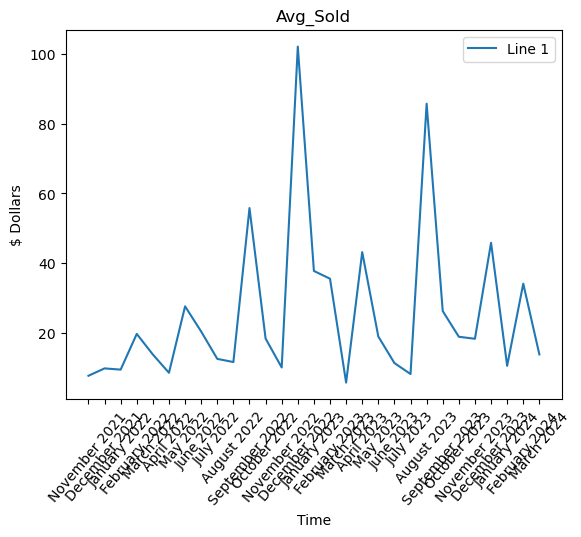

In [9]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Avg_Sold')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

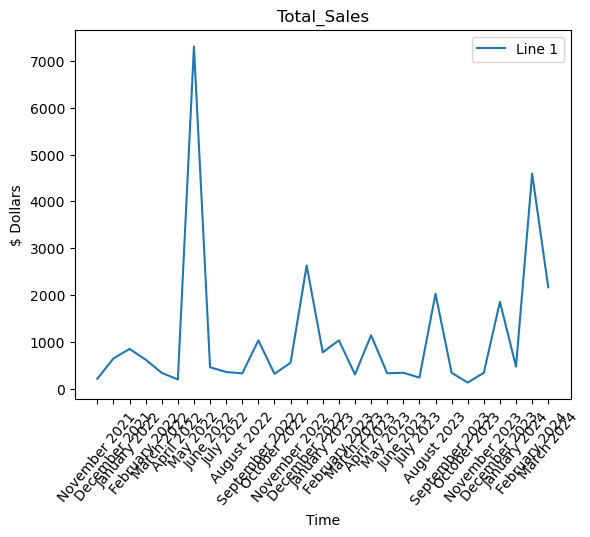

In [10]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Total_Sales'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Total_Sales')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

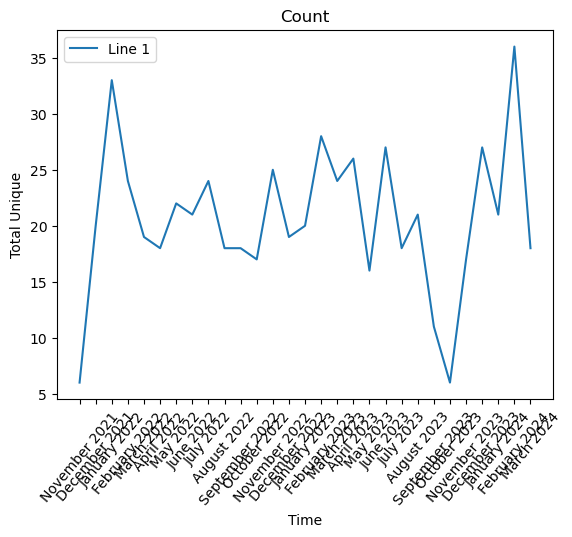

In [13]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Count'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Total Unique')
plt.title('Count')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

# Popular

In [59]:
filtered_df= data_df.loc[data_df['Avg_Sold_Price'] > 10]
filtered_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords,Month_Year
0,Skeleton Hands Necklace ~ Halloween Jewlery ~ ...,15.29,15.29,1.0,2024-03-18,0.00,"[Skeleton, Hands, Necklace, ~, Halloween, Jewl...",March 2024
4,Hard Jewlery Mini Cuban ChainHard Jewlery Mini...,19.00,19.00,1.0,2024-03-14,0.36,"[Hard, Jewlery, Mini, Cuban, ChainHard, Jewler...",March 2024
6,Premier Designs Jewlery Spring Break Colorful ...,29.00,29.00,1.0,2024-03-11,0.80,"[Premier, Designs, Jewlery, Spring, Break, Col...",March 2024
9,INVICTA RESERVE 925 MEN'S JEWLERY BEAD/SKULL A...,26.00,52.00,2.0,2024-03-06,0.00,"[INVICTA, RESERVE, MEN, JEWLERY, BEAD/SKULL, A...",March 2024
10,Dance Necklace Dancer Gift Ballerina Jewlery S...,26.95,53.90,2.0,2024-03-05,0.95,"[Dance, Necklace, Dancer, Gift, Ballerina, Jew...",March 2024
...,...,...,...,...,...,...,...,...
587,Photo Projection Necklace For Women Jewlery Pe...,18.99,56.97,3.0,2021-12-11,0.00,"[Photo, Projection, Necklace, Women, Jewlery, ...",December 2021
591,Natalie B Jewlery Vintage Inspired Turquiose N...,12.00,12.00,1.0,2021-12-04,0.65,"[Natalie, B, Jewlery, Vintage, Inspired, Turqu...",December 2021
592,NWT Fashion Jewlery Full Of Stones Necklace Ea...,34.00,34.00,1.0,2021-12-03,0.00,"[NWT, Fashion, Jewlery, Full, Stones, Necklace...",December 2021
593,Goth Heart Necklace For Women Stainless Steel ...,10.99,10.99,1.0,2021-12-01,0.00,"[Goth, Heart, Necklace, Women, Stainless, Stee...",December 2021


In [60]:
from collections import Counter
# Flatten the filtered lists
data_df_lists = filtered_df['Title_Keywords'].sum()

# Count the occurrences of each word
word_counts = Counter(data_df_lists)

# Find the most common words
most_common_words = word_counts.most_common()

In [61]:

def extract_phrases(title):
    tokens = title.split()  # Tokenize the title
    phrases = []
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + 6, len(tokens) + 1)):  # Generate combinations of 2 to 5 words
            phrase = ' '.join(tokens[i:j])
            if len(phrase.split()) >= 2 and len(phrase.split()) <= 5:  # Check if phrase length is between 2 and 5
                phrases.append(phrase)
    return phrases

# Apply the function to the Titles column
phrases = filtered_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])
most_common_phrases_df.head(25)

,Name,Count
0,Fashion Jewlery,30
1,Costume Jewlery,27
2,Pendant Necklace,24
3,Jewlery Pendant,22
4,Necklace For,22
5,Necklace For Women,22
6,For Women,22
7,Sterling Silver,20
8,Projection Necklace,18
9,Projection Necklace For,18


In [62]:
type_product = most_common_phrases_df['Name'].head(50).tolist()
type_product

['Fashion Jewlery',
 'Costume Jewlery',
 'Pendant Necklace',
 'Jewlery Pendant',
 'Necklace For',
 'Necklace For Women',
 'For Women',
 'Sterling Silver',
 'Projection Necklace',
 'Projection Necklace For',
 'Projection Necklace For Women',
 'Projection Necklace For Women Jewlery',
 'Necklace For Women Jewlery',
 'Necklace For Women Jewlery Pendant',
 'For Women Jewlery',
 'For Women Jewlery Pendant',
 'For Women Jewlery Pendant With',
 'Women Jewlery',
 'Women Jewlery Pendant',
 'Women Jewlery Pendant With',
 'Women Jewlery Pendant With Personalized',
 'Jewlery Pendant With',
 'Jewlery Pendant With Personalized',
 'Pendant With',
 'Pendant With Personalized',
 'With Personalized',
 'Jewlery Necklace',
 'Pendant Jewlery',
 'Kendra Scott',
 'Sterling Silver Necklace',
 'Silver Necklace',
 'Jewlery Lot',
 'Scott Jewlery',
 'Brand New',
 'Gold Tone',
 'Photo Projection',
 'Photo Projection Necklace',
 'Photo Projection Necklace For',
 'Photo Projection Necklace For Women',
 'Choker Neckla

In [63]:
dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': []}



In [68]:

dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': [], 'Count_Unique': []}


In [71]:
dict_sales

{'Phrase': ['Fashion Jewlery',
  'Costume Jewlery',
  'Pendant Necklace',
  'Jewlery Pendant',
  'Necklace For',
  'Necklace For Women',
  'For Women',
  'Sterling Silver',
  'Projection Necklace',
  'Projection Necklace For',
  'Projection Necklace For Women',
  'Projection Necklace For Women Jewlery',
  'Necklace For Women Jewlery',
  'Necklace For Women Jewlery Pendant',
  'For Women Jewlery',
  'For Women Jewlery Pendant',
  'For Women Jewlery Pendant With',
  'Women Jewlery',
  'Women Jewlery Pendant',
  'Women Jewlery Pendant With',
  'Women Jewlery Pendant With Personalized',
  'Jewlery Pendant With',
  'Jewlery Pendant With Personalized',
  'Pendant With',
  'Pendant With Personalized',
  'With Personalized',
  'Jewlery Necklace',
  'Pendant Jewlery',
  'Kendra Scott',
  'Sterling Silver Necklace',
  'Silver Necklace',
  'Jewlery Lot',
  'Scott Jewlery',
  'Brand New',
  'Gold Tone',
  'Photo Projection',
  'Photo Projection Necklace',
  'Photo Projection Necklace For',
  'Phot

In [76]:


for phrase in type_product:
    # Filter rows where 'filtered_df' or 'Vitamin' is in the list
    temp_df = filtered_df[filtered_df['Listing'].apply(lambda x: phrase in x)]

    mean = temp_df.describe()['Avg_Sold_Price'].tolist()[1]

    percent_25 = temp_df.describe()['Avg_Sold_Price'].tolist()[4]

    percent_75 = temp_df.describe()['Avg_Sold_Price'].tolist()[6]

    total = temp_df['Total_Sold'].sum()

    ship = temp_df.describe()['Shipping'].tolist()[5]
    
    count =  temp_df.describe()['Total_Sold'].tolist()[0]
    
    dict_sales['Phrase'].append(phrase)
    dict_sales['Avg_Sold_Price_mean'].append(mean)
    dict_sales['Avg_Sold_Price_25'].append(percent_25)
    dict_sales['Avg_Sold_Price_75'].append(percent_75)
    dict_sales['Total_Sold'].append(total)
    dict_sales['Ship_Cost'].append(ship)
    dict_sales['Count_Unique'].append(count)
    
stats_df = pd.DataFrame.from_dict(dict_sales)

stats_df['Ratio_Sold_Count'] = stats_df['Total_Sold'] / stats_df['Count_Unique']

In [77]:
stats_df.sort_values(by='Avg_Sold_Price_mean', ascending=False).head(10)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost,Count_Unique,Ratio_Sold_Count
43,Jewlery Gold,479.15800,16.0000,645.0000,5.0,0.900,5.0,1.000
93,Jewlery Gold,479.15800,16.0000,645.0000,5.0,0.900,5.0,1.000
81,Jewlery Lot,122.88000,19.7475,72.4925,6.0,0.250,6.0,1.000
31,Jewlery Lot,122.88000,19.7475,72.4925,6.0,0.250,6.0,1.000
92,Jewlery with,68.72500,12.6750,100.0000,4.0,0.075,4.0,1.000
42,Jewlery with,68.72500,12.6750,100.0000,4.0,0.075,4.0,1.000
82,Scott Jewlery,60.09600,32.9900,79.9900,5.0,0.000,5.0,1.000
32,Scott Jewlery,60.09600,32.9900,79.9900,5.0,0.000,5.0,1.000
28,Kendra Scott,59.48125,31.3675,76.2475,9.0,0.000,8.0,1.125
78,Kendra Scott,59.48125,31.3675,76.2475,9.0,0.000,8.0,1.125


In [78]:
stats_df.sort_values(by='Total_Sold', ascending=False).head(10)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost,Count_Unique,Ratio_Sold_Count
54,Necklace For,22.200000,18.695,25.19,66.0,0.0,11.0,6.000000
55,Necklace For Women,22.200000,18.695,25.19,66.0,0.0,11.0,6.000000
4,Necklace For,22.200000,18.695,25.19,66.0,0.0,11.0,6.000000
5,Necklace For Women,22.200000,18.695,25.19,66.0,0.0,11.0,6.000000
6,For Women,22.200000,18.695,25.19,66.0,0.0,11.0,6.000000
56,For Women,22.200000,18.695,25.19,66.0,0.0,11.0,6.000000
3,Jewlery Pendant,52.422000,18.990,25.29,65.0,0.0,10.0,6.500000
53,Jewlery Pendant,52.422000,18.990,25.29,65.0,0.0,10.0,6.500000
69,Women Jewlery Pendant With,21.691111,18.990,24.99,64.0,0.0,9.0,7.111111
37,Photo Projection Necklace For,21.691111,18.990,24.99,64.0,0.0,9.0,7.111111


In [79]:
stats_df.sort_values(by='Ratio_Sold_Count', ascending=False).head(10)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost,Count_Unique,Ratio_Sold_Count
86,Photo Projection Necklace,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
71,Jewlery Pendant With,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
69,Women Jewlery Pendant With,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
35,Photo Projection,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
36,Photo Projection Necklace,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
37,Photo Projection Necklace For,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
38,Photo Projection Necklace For Women,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
85,Photo Projection,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
75,With Personalized,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
74,Pendant With Personalized,21.691111,18.99,24.99,64.0,0.0,9.0,7.111111
